In [2]:
#optional setting to be able to move 3D plots around
#%matplotlib notebook

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import mdp

In [3]:
df = pd.read_csv("./data/synthetic_basic/Synthetic_Basic_49.csv")

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2629440 entries, 0 to 2629439
Data columns (total 7 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Unnamed: 0               object 
 1   Power                    float64
 2   POA                      float64
 3   Tamb                     float64
 4   Wind                     float64
 5   Degradation_rate_per_yr  float64
 6   soiling                  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 140.4+ MB


In [123]:
df.head()

,Unnamed: 0,Power,POA,Tamb,Wind,Degradation_rate_per_yr,soiling
0,2015-01-01 00:00:00-05:00,-1.0,0.0,5.1,0.0,-0.0112,1
1,2015-01-01 00:01:00-05:00,-1.0,0.0,5.1,0.0,-0.0112,1
2,2015-01-01 00:02:00-05:00,-1.0,0.0,5.1,0.0,-0.0112,1
3,2015-01-01 00:03:00-05:00,-1.0,0.0,5.1,0.0,-0.0112,1
4,2015-01-01 00:04:00-05:00,-1.0,0.0,5.1,0.0,-0.0112,1


In [4]:
#Adding features Day, Month, Year

df['Year'] = df['Unnamed: 0'].apply(lambda x: x.split(' ')[0].split('-')[0])
df['Month'] = df['Unnamed: 0'].apply(lambda x: x.split(' ')[0].split('-')[1])
df['Day'] = df['Unnamed: 0'].apply(lambda x: x.split(' ')[0].split('-')[2])
df['Hour'] = df['Unnamed: 0'].apply(lambda x: x.split(' ')[1][0:2])

In [5]:
from datetime import date

def get_day_of_year(timestamp):
    first_of_jan = date(int(timestamp.split(' ')[0].split('-')[0]), 1, 1)
    current_day = date(int(timestamp.split(' ')[0].split('-')[0]),
                       int(timestamp.split(' ')[0].split('-')[1]),
                       int(timestamp.split(' ')[0].split('-')[2]))
    return 1 + (current_day - first_of_jan).days

df['Day_of_year'] = df['Unnamed: 0'].apply(lambda x: get_day_of_year(x))

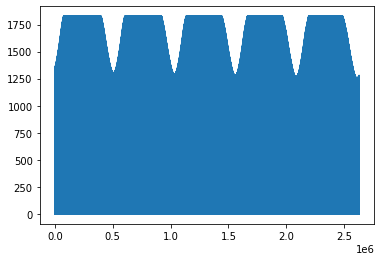

In [5]:
plt.plot(df.Power)

In [119]:
df.describe()

,Power,POA,Tamb,Wind,Degradation_rate_per_yr,soiling
count,2.629440e+06,2.629440e+06,2.629440e+06,2629440.0,2.629440e+06,2629440.0
mean,5.248366e+02,2.319570e+02,1.647911e+01,0.0,-1.436000e-02,1.0
std,6.923861e+02,3.074970e+02,7.173076e+00,0.0,5.204171e-17,0.0
min,-1.000000e+00,0.000000e+00,2.900000e+00,0.0,-1.436000e-02,1.0
25%,-1.000000e+00,0.000000e+00,9.900000e+00,0.0,-1.436000e-02,1.0
50%,-1.000000e+00,0.000000e+00,1.740000e+01,0.0,-1.436000e-02,1.0
75%,1.170000e+03,4.820000e+02,2.260000e+01,0.0,-1.436000e-02,1.0
max,1.827000e+03,9.500000e+02,2.790000e+01,0.0,-1.436000e-02,1.0


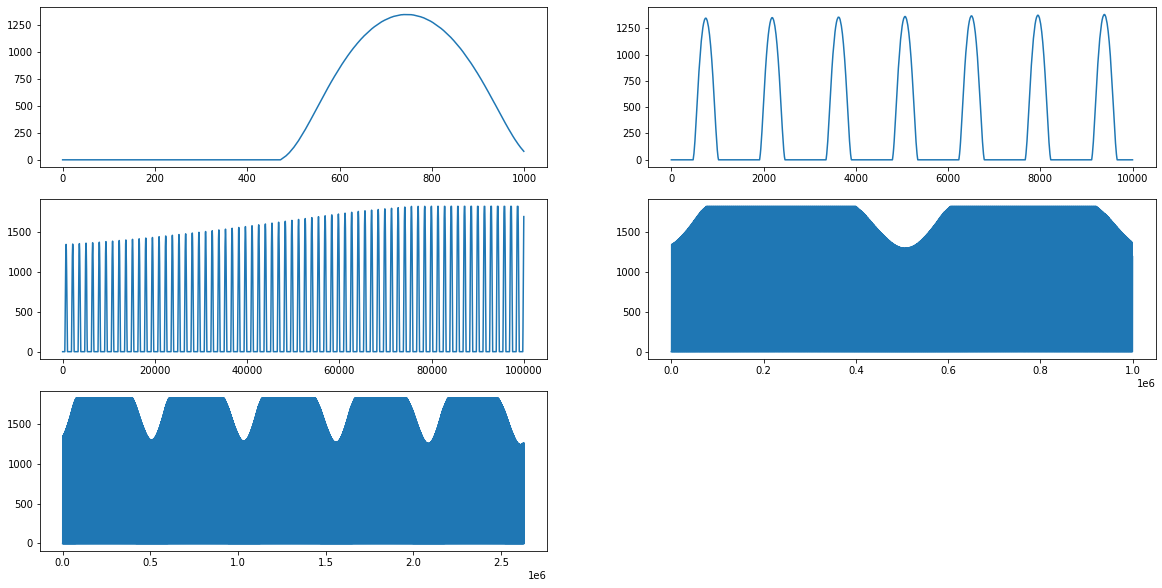

In [124]:
plt.figure(figsize=(20,10))
plt.subplot(3,2,1)
plt.plot(df.iloc[0:1000].Power)
plt.subplot(3,2,2)
plt.plot(df.iloc[0:10000].Power)
plt.subplot(3,2,3)
plt.plot(df.iloc[0:100000].Power)
plt.subplot(3,2,4)
plt.plot(df.iloc[0:1000000].Power)
plt.subplot(3,2,5)
plt.plot(df.iloc[0:10000000].Power)
plt.show()

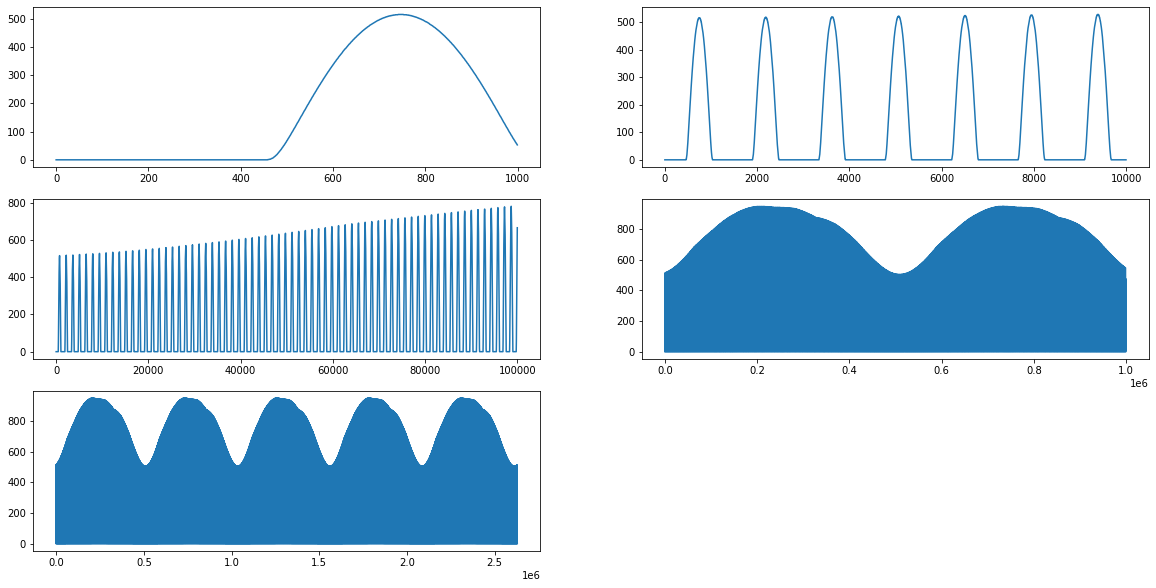

In [127]:
plt.figure(figsize=(20,10))
plt.subplot(3,2,1)
plt.plot(df.iloc[0:1000].POA)
plt.subplot(3,2,2)
plt.plot(df.iloc[0:10000].POA)
plt.subplot(3,2,3)
plt.plot(df.iloc[0:100000].POA)
plt.subplot(3,2,4)
plt.plot(df.iloc[0:1000000].POA)
plt.subplot(3,2,5)
plt.plot(df.iloc[0:10000000].POA)
plt.show()

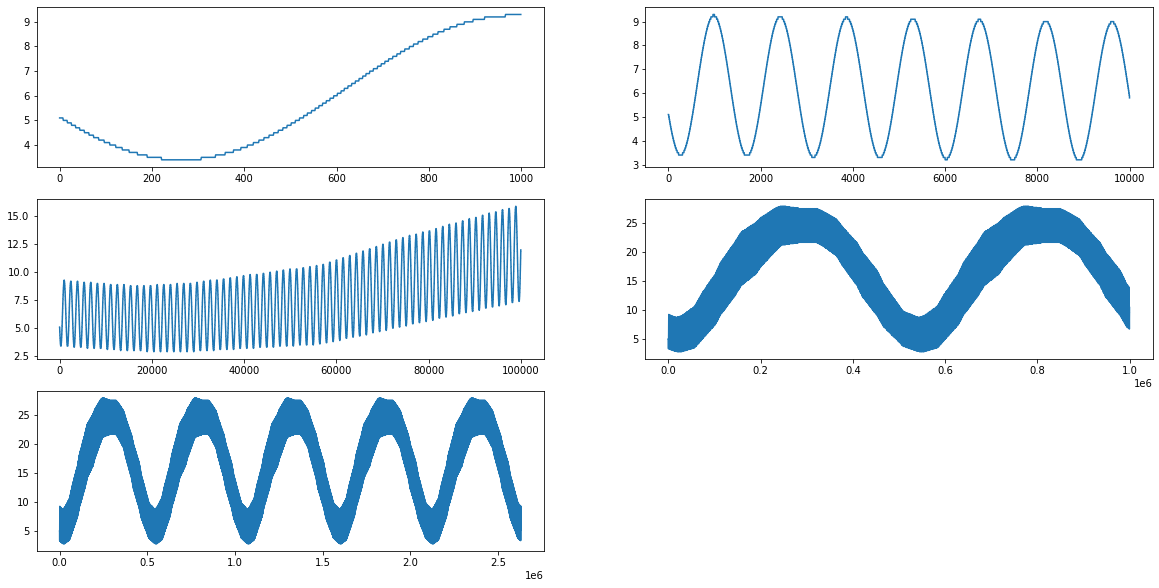

In [9]:
plt.figure(figsize=(20,10))
plt.subplot(3,2,1)
plt.plot(df.iloc[0:1000].Tamb)
plt.subplot(3,2,2)
plt.plot(df.iloc[0:10000].Tamb)
plt.subplot(3,2,3)
plt.plot(df.iloc[0:100000].Tamb)
plt.subplot(3,2,4)
plt.plot(df.iloc[0:1000000].Tamb)
plt.subplot(3,2,5)
plt.plot(df.iloc[0:10000000].Tamb)
plt.show()

## Testing Slow Feature Analysis

Based on https://towardsdatascience.com/a-brief-introduction-to-slow-feature-analysis-18c901bc2a58

In [24]:
power_every_100 = np.array([[df.Power[i]] for i in range(0,2629440,100)])
timeframes = mdp.nodes.TimeFramesNode(5)
timeframed_S = timeframes.execute(power_every_100)

In [25]:
cubic_expand = mdp.nodes.PolynomialExpansionNode(3)
cubic_expanded_S = cubic_expand(timeframed_S)
sfa = mdp.nodes.SFANode(output_dim=1)
slow = sfa.execute(cubic_expanded_S)

In [26]:
slow = slow.flatten()
padded_slow = np.concatenate([[slow[0]], slow, [slow[296]], [slow[296]]])

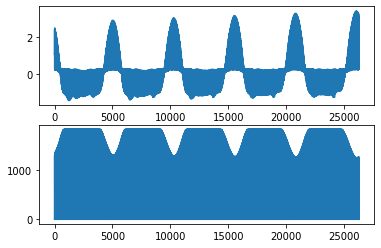

In [31]:
plt.figure()
plt.subplot(2,1,1)
plt.plot(padded_slow)
plt.subplot(2,1,2)
plt.plot(power_every_100)

In [70]:
power_daily = []
for i in range(2000,len(power)):
    if i%2000==0:
        power_daily.append(max(power[i-2000:i]))

In [114]:
timeframes = mdp.nodes.TimeFramesNode(1000)
timeframed_S = timeframes.execute(np.array([[x] for x in power]))
cubic_expand = mdp.nodes.PolynomialExpansionNode(1)
cubic_expanded_S = cubic_expand(timeframed_S)
sfa = mdp.nodes.SFANode(output_dim=1, rank_deficit_method='auto')
slow = sfa.execute(cubic_expanded_S)
slow = slow.flatten()
padded_slow = np.concatenate([[slow[0]], slow, [slow[296]], [slow[296]]])

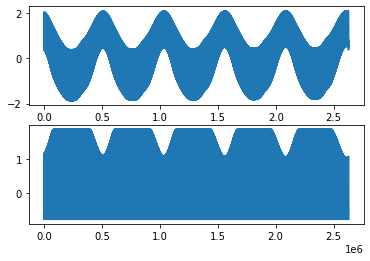

In [115]:
plt.figure()
plt.subplot(2,1,1)
plt.plot(padded_slow)
plt.subplot(2,1,2)
plt.plot(power)

## Further exploration

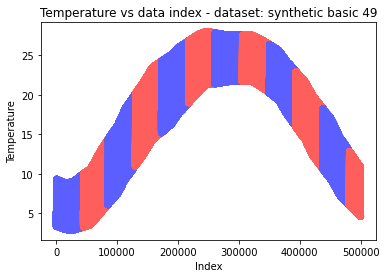

In [166]:
colors = ["#ff5f5c" if int(x)%2 == 0 else "#5c5fff" for x in df.Month[:500000]]
plt.figure()
plt.scatter(range(0,500000),df.Tamb[:500000], color=colors[:])
plt.title("Temperature vs data index - dataset: synthetic basic 49")
plt.xlabel("Index")
plt.ylabel('Temperature')
plt.show()

### Plotting data along several axes of time

<IPython.core.display.Javascript object>


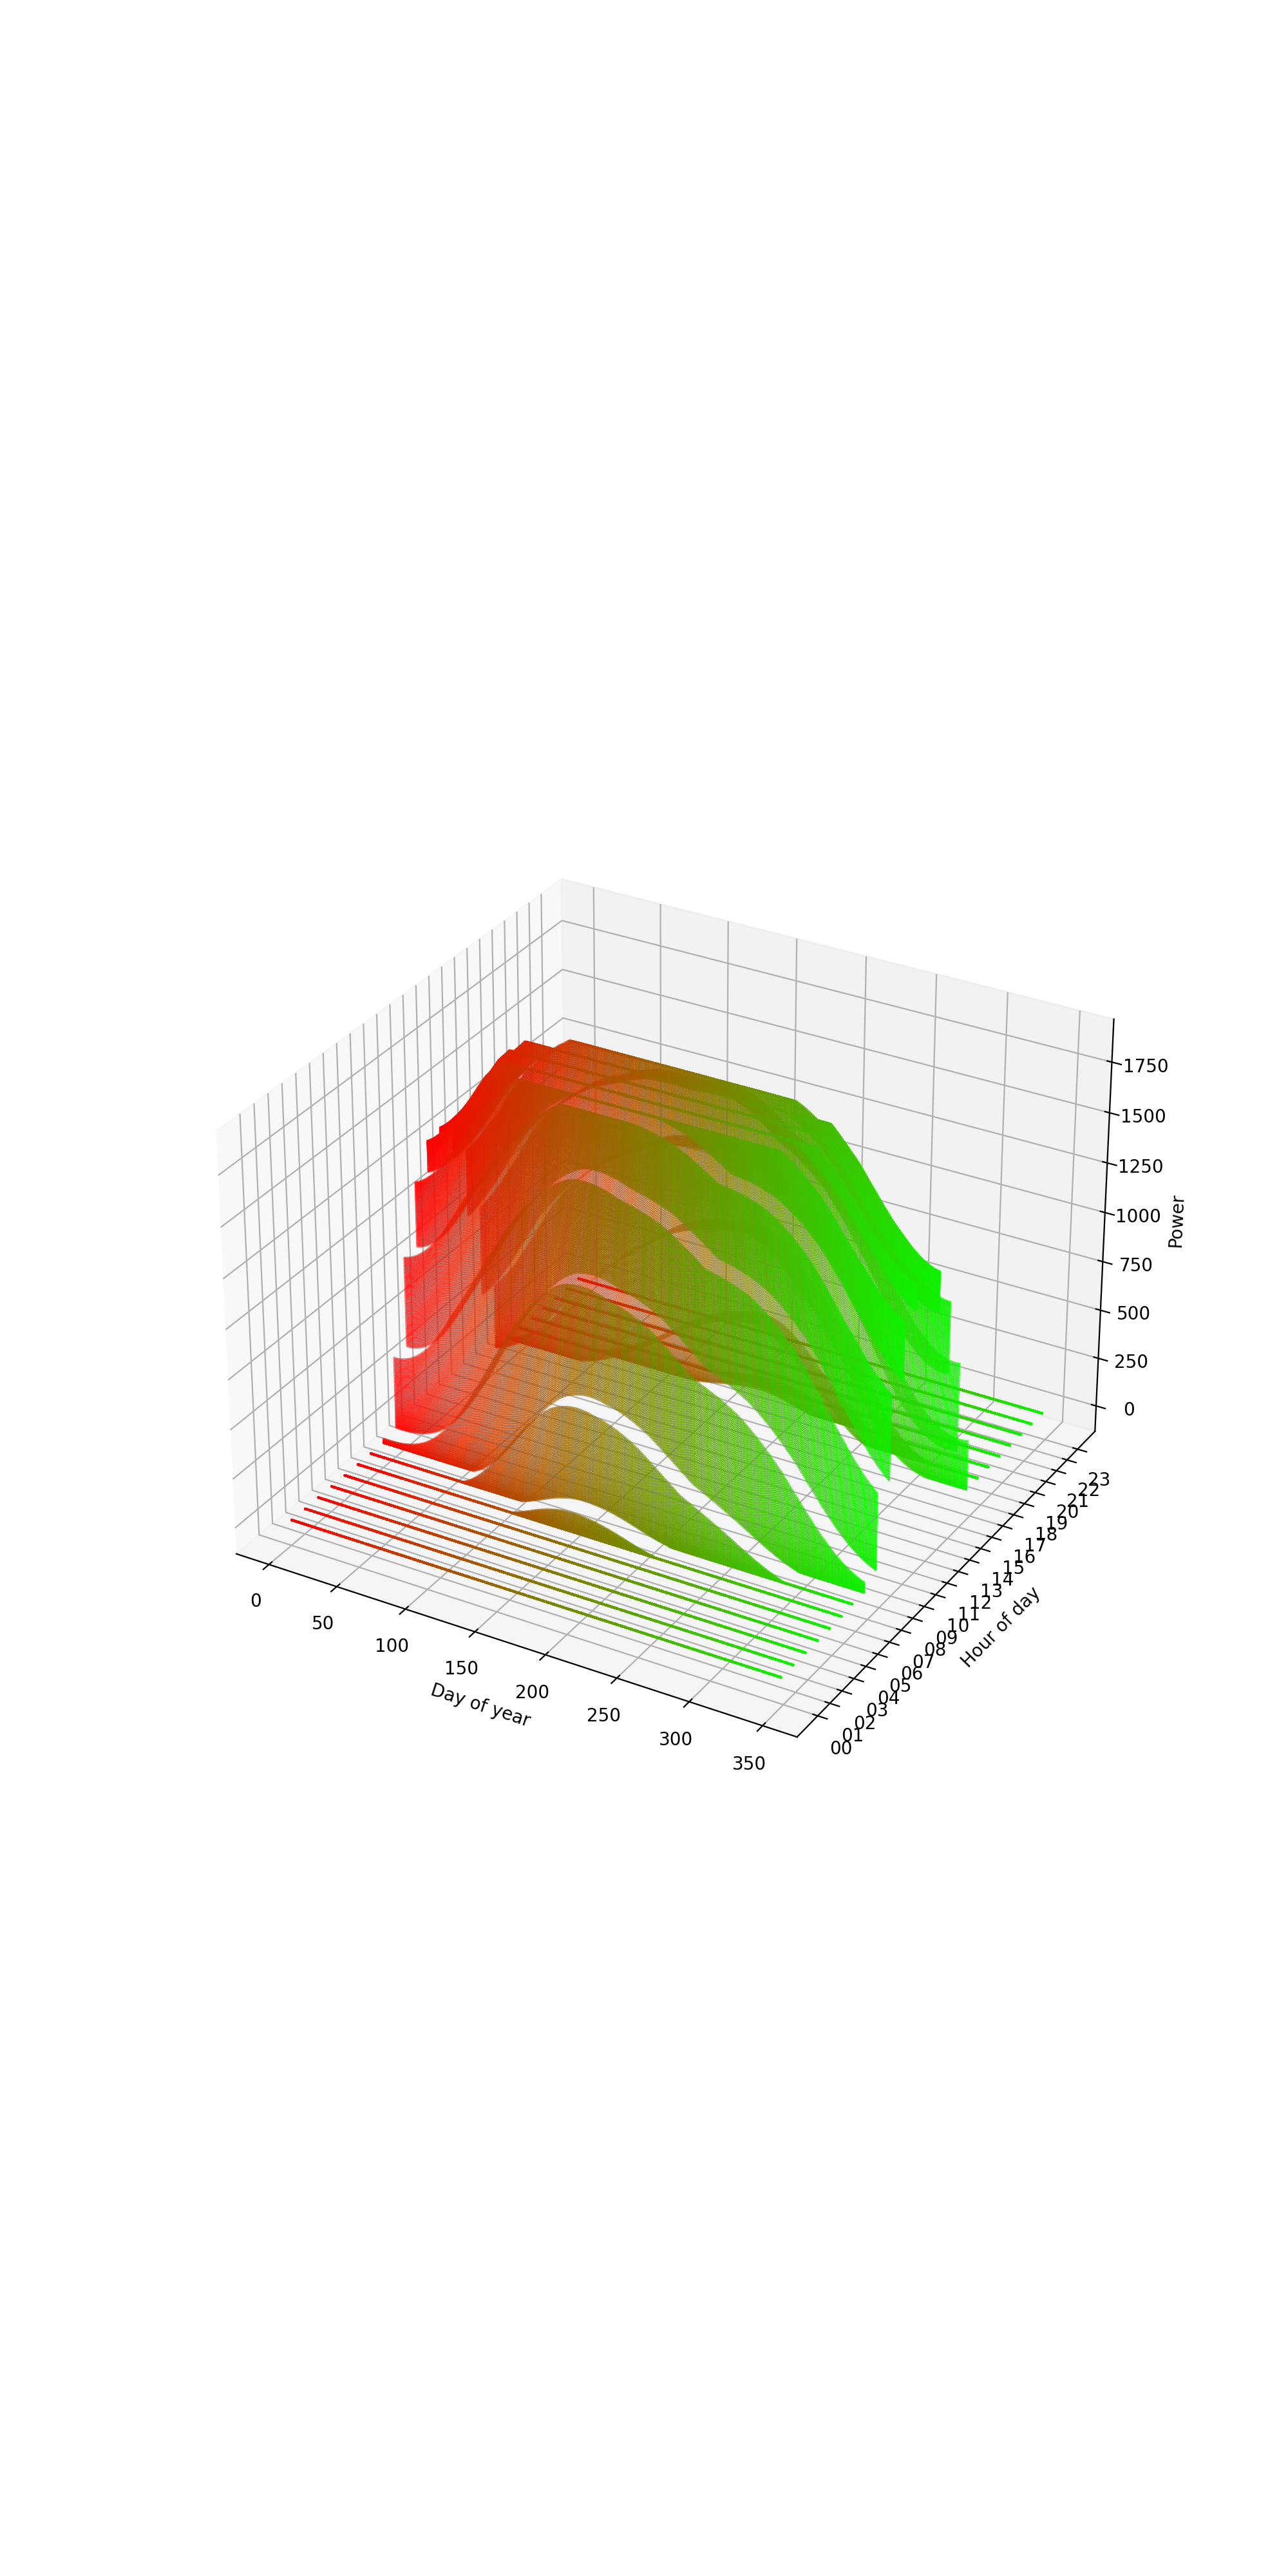

In [26]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

fig = plt.figure(figsize=(10,20))
ax = fig.add_subplot(111, projection='3d')

#for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
#    xs = randrange(n, 23, 32)
#    ys = randrange(n, 0, 100)
#    zs = randrange(n, zlow, zhigh)
ax.scatter(df.Day_of_year[0:500000],df.Hour[0:500000],df.Power[0:500000], s=0.1, color=[(1-x/366.0,x/366.0,0.0) for x in df.Day_of_year[0:500000]])

ax.set_xlabel('Day of year')
ax.set_ylabel('Hour of day')
ax.set_zlabel('Power')

plt.show()

[0, 10, 20, 30, 40]